In [11]:
import numpy as np
import torch
from torch.distributions import Uniform
from scipy.stats import norm
import pickle

import matplotlib.pyplot as plt

In [343]:
sigma_noise = 0.1
N = 25
M=60

In [325]:
X_l=Uniform(torch.tensor([-1.0]), torch.tensor([-.5])).sample(sample_shape=torch.Size([int(M)])).squeeze()
X_r=Uniform(torch.tensor([.5]), torch.tensor([1.0])).sample(sample_shape=torch.Size([int(M)])).squeeze()
X_in=torch.cat([X_l,X_r])
X.shape,X_in.shape


(torch.Size([15, 1]), torch.Size([120]))

In [348]:


X = Uniform(torch.tensor([-2.0]), torch.tensor([2.0])).sample(sample_shape=torch.Size([int(N)])).squeeze()




In [349]:
e = torch.from_numpy(norm.rvs(loc=0, scale=sigma_noise, size=N)).float()
y = torch.cos(4.0*(X+0.2)) + e

e_in = torch.from_numpy(norm.rvs(loc=0, scale=sigma_noise, size=2*M)).float()
y_in = torch.cos(4.0*(X_in+0.2)) + e_in



(-3.0, 3.0)

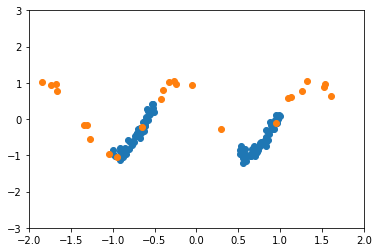

In [357]:
%matplotlib inline
plt.scatter(X_in,y_in)

plt.scatter(X,y)
plt.xlim(-2.,2.)
plt.ylim(-3.,3.)

In [352]:
torch.save((X.unsqueeze(-1),y),'New_toy_data/foong_train_sparse.pt')

In [353]:
torch.save((X_in.unsqueeze(-1),y_in),'New_toy_data/foong_train_out.pt')

In [354]:
X_train_mixed=torch.cat([X.unsqueeze(-1),X_in.unsqueeze(-1)], dim=0)
y_train_mixed=torch.cat([y,y_in], dim=0)

In [355]:
torch.save((X_train_mixed,y_train_mixed),'New_toy_data/foong_train_mixed.pt')

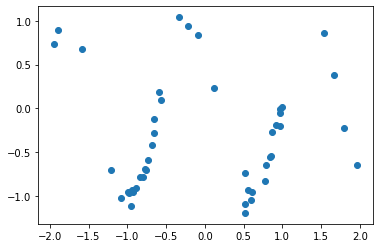

In [282]:
plt.scatter(X_train_mixed,y_train_mixed)

In [321]:
X, y=torch.load('New_toy_data/foong_train_sparse.pt')

torch.Size([15, 1])

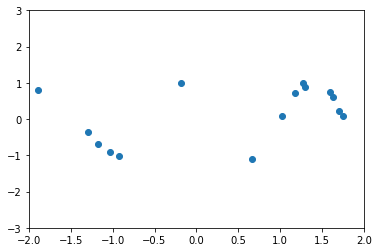

In [323]:
plt.scatter(X,y)
plt.xlim(-2.,2.)
plt.ylim(-3.,3.)
X.shape

In [103]:
X_validation.shape

torch.Size([2000, 1])

In [108]:
X_validation.min(), X_validation.max()

(tensor(-0.9992), tensor(1.0990))

# Model #

$$
y = \cos(4.0*(X+0.2)) + \epsilon, \quad \text{with $\epsilon \sim \mathcal{N}(0., 0.1)$}
$$


# sparse data #

train: 25 samples from uniform $[-2,2]$

validation: 15 samples from uniform $[-2,2]$

# out of distribution data #

train: 60 samples from uniform $[-1.,-.5]$ and 60 from uniform $[.5,1.]$.

validation: 30 samples, 15 from uniform $[-1.,-.5]$ and 15 from uniform $[.5,1.]$.


# mixed data #
train: union of the training sets from sparse and OOD data. 145 samples

validation: union of the two validation sets.


# test data #
test: 600 samples from $[-2,2]$